In [1]:
# Add the package to the environment
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl`
Precompiling project...
   2479.7 ms  ✓ YieldFactorModels
  1 dependency successfully precompiled in 5 seconds. 418 already precompiled.


In [2]:
# Import the package and required dependencies
using Revise
using YieldFactorModels
using LinearAlgebra
using ForwardDiff
using Random

Random.seed!(123)  # For reproducibility


# NOTE: `export VAR=...` is a shell command and is not valid Julia syntax in a code cell.
# For runtime settings that can be changed from within Julia use `ENV` or library APIs.
# Set BLAS / native libraries thread knobs where possible:
ENV["OPENBLAS_NUM_THREADS"] = "1"
ENV["OMP_NUM_THREADS"] = "1"
ENV["MKL_NUM_THREADS"] = "1"  # If MKL.jl is used, prefer MKL.set_num_threads(1)
# Also set BLAS threads from Julia (affects LinearAlgebra.BLAS):
LinearAlgebra.BLAS.set_num_threads(1)


cd("..")

In [35]:
# set pwd one level back 

YieldFactorModels.run("6", 231, 12, false, "TVλ", Float64; window_type = "expanding",  max_group_iters=10, run_optimization=true, reestimate=false )
# vcat(fill("1", 22), fill("2", 12) )

Default param groups assigned.
The param groups are : ["1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1"]
✓ Found valid initial parameters after 0 perturbations

Starting block-coordinate optimization

--- Starting point 1/1 ---
Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     7.703222e+02     1.343564e+04
 * time: 0.00022602081298828125
   100    -1.982581e+03     3.393529e+01
 * time: 0.5742690563201904
   200    -2.018776e+03     1.074412e+01
 * time: 1.4077610969543457
   300    -2.066151e+03     5.502268e+00
 * time: 1.9186930656433105
   400    -2.089678e+03     3.820085e+00
 * time: 2.4058361053466797
   500    -2.124295e+03     4.376354e+00
 * time: 2.886549949645996
Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0    -2.129985e+03     1.606131e+03
 * time: 0.00021600723266601562
   100 

YieldFactorModels.TVλDNSModel{Float64, Float64}(YieldFactorModels.KalmanBaseModel{Float64, Float64}([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  30.0, 36.0, 48.0, 60.0, 72.0, 84.0, 96.0, 108.0, 120.0, 180.0], 24, 4, 1, [1.0 0.9877580859802979 0.012141594341236517 72.33661401986859; 1.0 0.9757155822062547 0.02388804344814388 34.34814934452526; … ; 1.0 0.3201242765555238 0.2684236326089939 -0.25876609688198726; 1.0 0.22240588139407874 0.2106503049871544 -0.08343003175764108], [4.935803587208967, -0.6682137048399671, -1.8203987344144972, -4.141689141040151], [0.9797525506410376 0.005280104747450888 -0.01012194648384958 0.011081512205646144; 0.001755842860308205 0.9480797963460612 0.06728611834510641 0.02831829677418; 0.06019280664508098 0.13576930320984273 0.7280886005361467 0.0973392055591129; 0.03789370141826961 -0.03583726440809843 0.060975652579090496 0.6830490063601258], [0.16798954299307095, 0.0020626659983927075, -0.05887149375536773, -1.3256375716153581], [0.0], [0.07503

In [17]:
using CairoMakie
using DelimitedFiles

(480, 24)
(480, 4)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


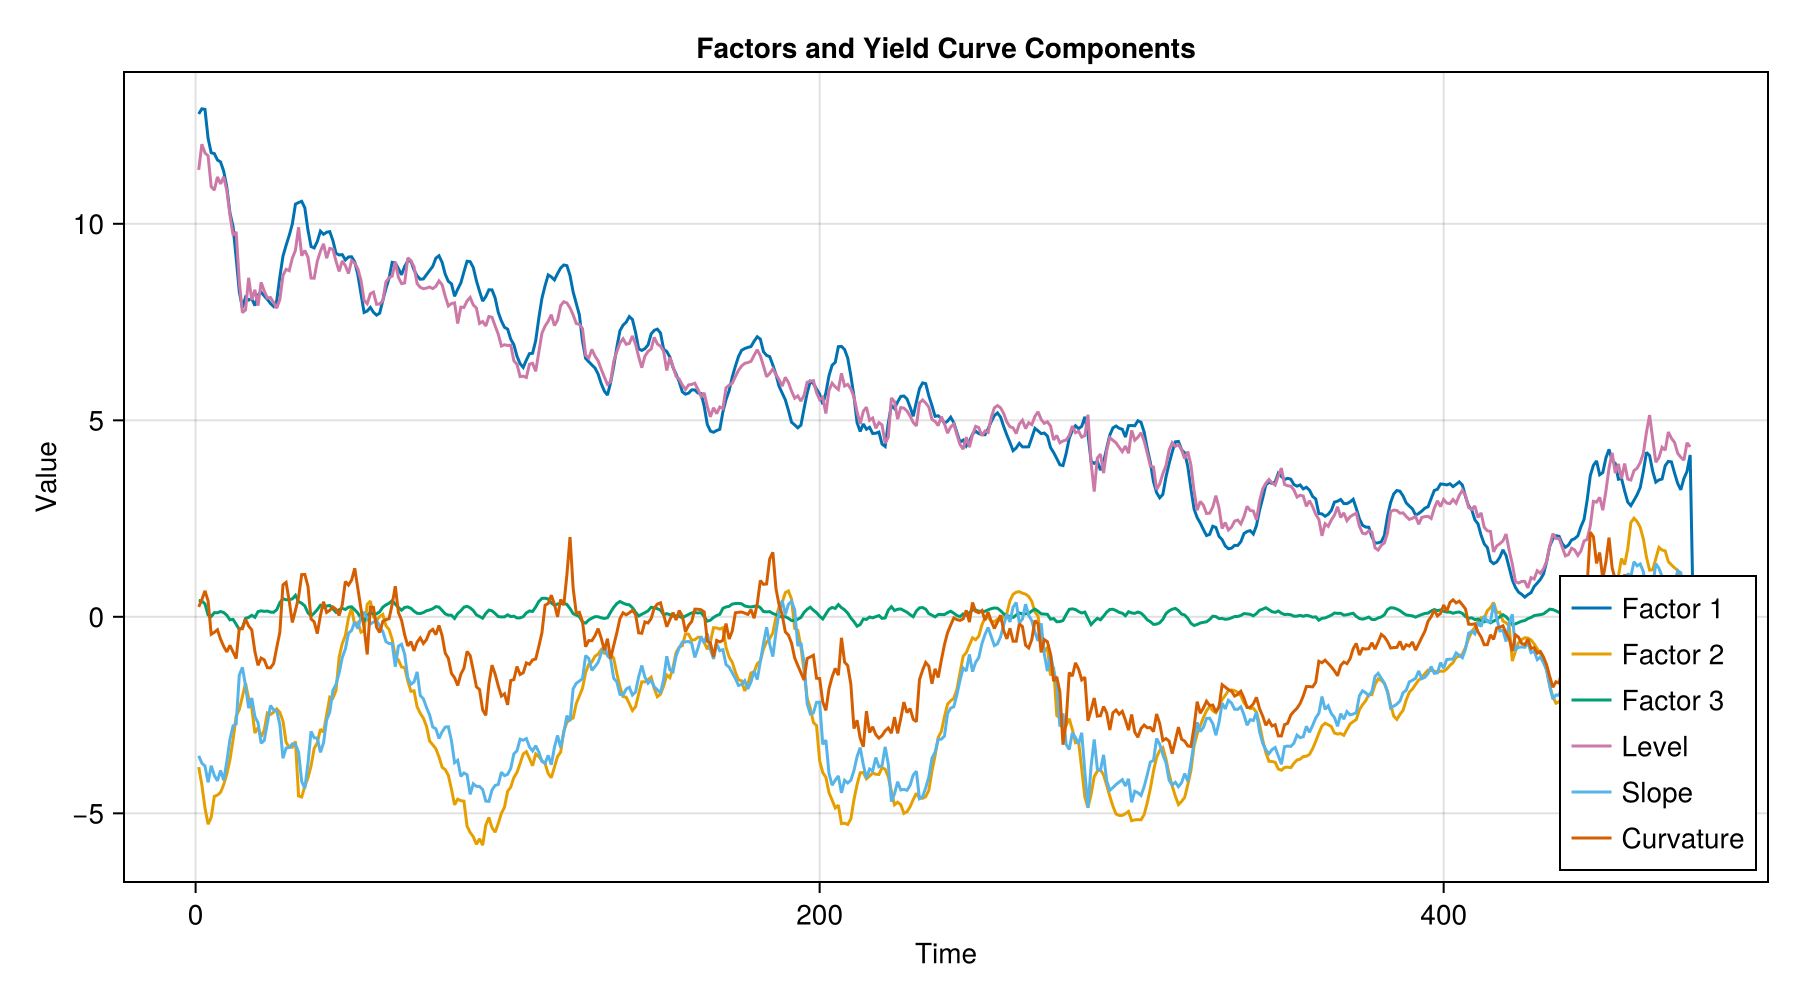

In [18]:
model_name = "1C"
# read /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/results/SD-NS/SD-NS__thread_id__6__factors_filtered_outofsample.csv
filtered_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__factors_filtered_outofsample.csv", ',')
# /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv
data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv", ',')
data = data'
# print shape
println(size(data))
println(size(filtered_data))

# plot first 3 factors over time using CairoMakie

f = Figure(resolution = (900, 500))
ax = Axis(f[1, 1], xlabel = "Time", ylabel = "Value", title = "Factors and Yield Curve Components")
lines!(ax, filtered_data[:, 1], label = "Factor 1")
lines!(ax, filtered_data[:, 2], label = "Factor 2")
lines!(ax, filtered_data[:, 3], label = "Factor 3")

# plot level, slope and curvature from data
# level is last column
lines!(ax, data[1:end-1, end], label = "Level")
# slope is difference between first and last column
lines!(ax, data[1:end-1, 1] .- data[1:end-1, end], label = "Slope")
# curvature: 2 x 14th column - (1st + last)
lines!(ax, 2 .* data[1:end-1, 14] .- (data[1:end-1, 1] .+ data[1:end-1, end]), label = "Curvature")

axislegend(ax, position = :rb)
f

(480, 24)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


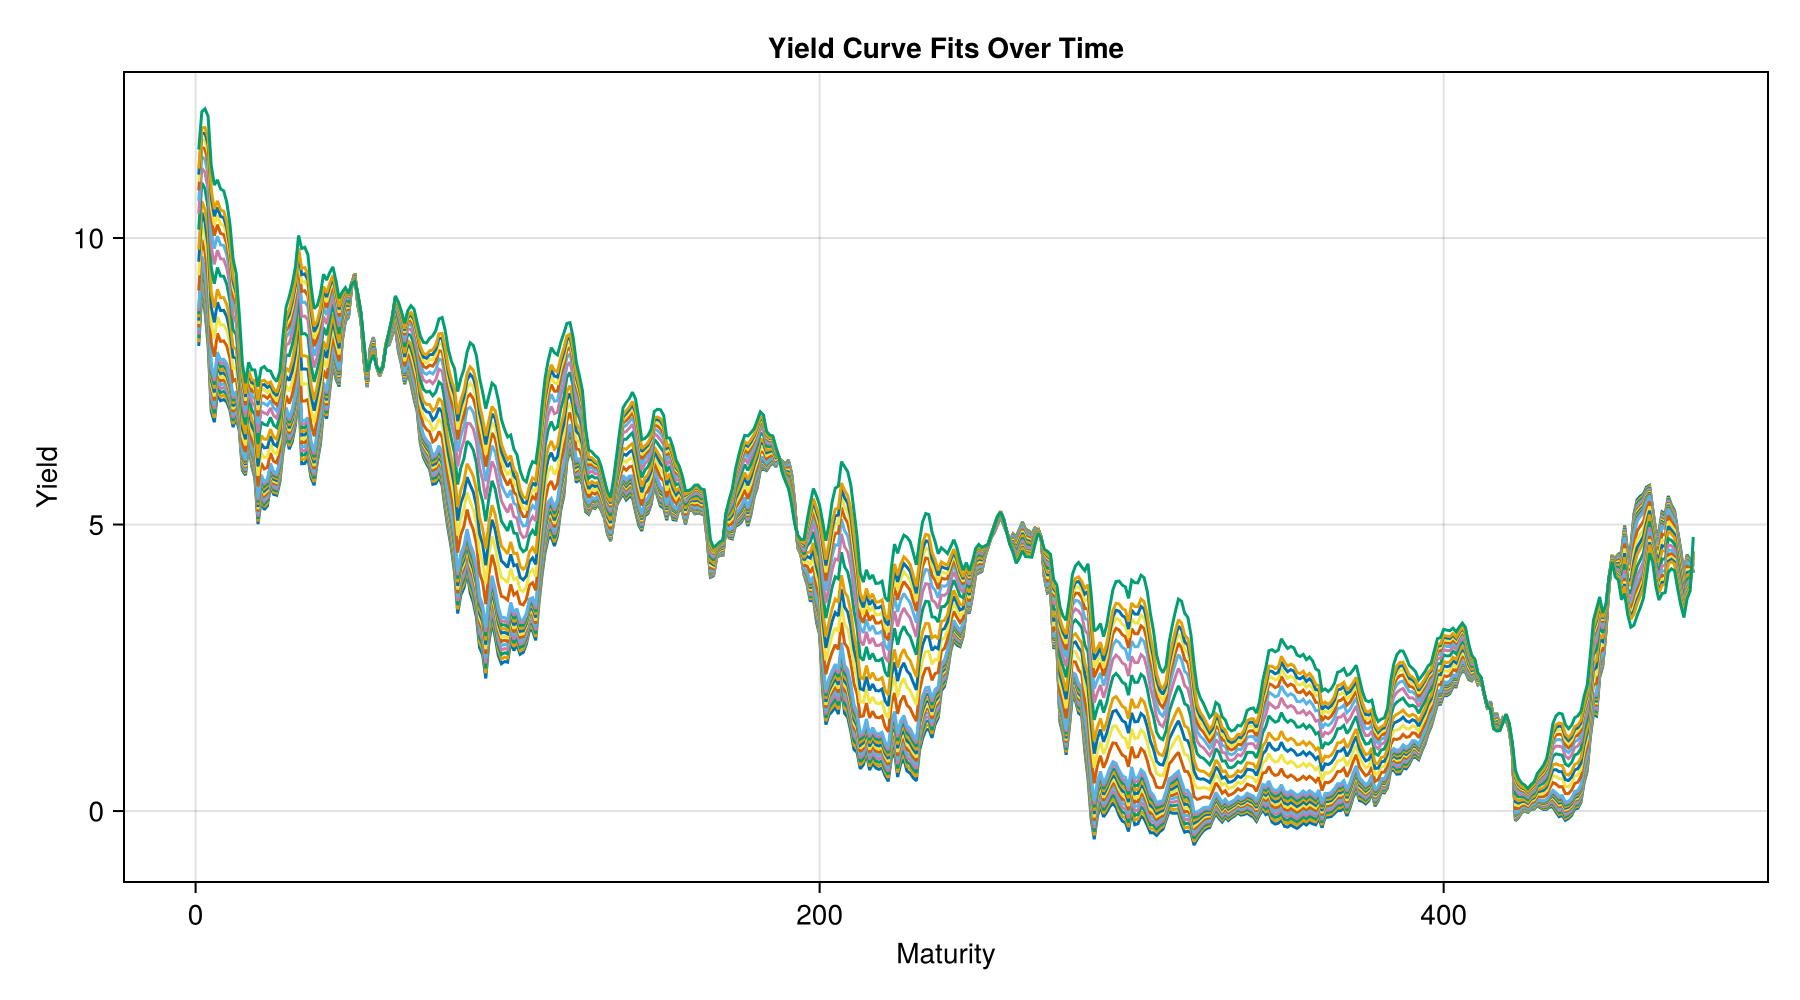

In [19]:
# plot predictions /Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/NS/NS__thread_id__6__fit_filtered_outofsample.csv
fit_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__fit_filtered_outofsample.csv", ',')

# size is (480, 24)
println(size(fit_data))

# plot all 24 lines in one plot 
f2 = Figure(resolution = (900, 500))
ax2 = Axis(f2[1, 1], xlabel = "Maturity", ylabel = "Yield", title = "Yield Curve Fits Over Time")
for i in 1:size(fit_data, 2)
    lines!(ax2, 1:size(fit_data, 1), fit_data[:, i])
end
f2
